## CNN Model


### Dataset - Modified National Institute of Standards and Technology
70,000 images of handwritten digits (0 to 9)

In [9]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)#shape converting it to 2D
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# One-hot encode the labels
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [11]:
# Normalize the data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)
datagen.fit(x_train)

### Size of dataset

In [15]:
# Check the size of the dataset
print(f"Training set size: {x_train.shape[0]} samples")
print(f"Test set size: {x_test.shape[0]} samples")

Training set size: 60000 samples
Test set size: 10000 samples


In [12]:
# Model parameters
batch_size = 128
num_classes = 10
epochs = 10  # Increased number of epochs

# Build the model
model = Sequential()
model.add(Conv2D(64, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))  # Reduced dropout rate
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))  # Reduced dropout rate
model.add(Dense(num_classes, activation='softmax'))

C:\Users\shrut\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
# Compile the model with Adam optimizer
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

# Train the model with data augmentation
hist = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size), epochs=epochs, verbose=1, validation_data=(x_test, y_test))
print("The model has successfully trained")

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 111s 231ms/step - accuracy: 0.7055 - loss: 0.8804 - val_accuracy: 0.9842 - val_loss: 0.0474
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 551s 1s/step - accuracy: 0.9531 - loss: 0.1603 - val_accuracy: 0.9894 - val_loss: 0.0301
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 109s 231ms/step - accuracy: 0.9688 - loss: 0.1093 - val_accuracy: 0.9925 - val_loss: 0.0219
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 109s 231ms/step - accuracy: 0.9757 - loss: 0.0854 - val_accuracy: 0.9913 - val_loss: 0.0244
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 109s 230ms/step - accuracy: 0.9781 - loss: 0.0777 - val_accuracy: 0.9927 - val_loss: 0.0222
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 108s 229ms/step - accuracy: 0.9805 - loss: 0.0696 - val_accuracy: 0.9941 - val_loss: 0.0192
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 109s 233ms/step - accuracy: 0.9828 - loss: 0.0620 - val_accuracy: 0.9946 - val_loss: 0.0171
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 111s 236ms/step - accuracy: 0.9850 - lo

In [14]:
# Evaluate the model on the test set
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.019025692716240883
Test accuracy: 0.9939000010490417


### Train Accuracy - 0.9864
### Test Accuracy - 0.9939000010490417

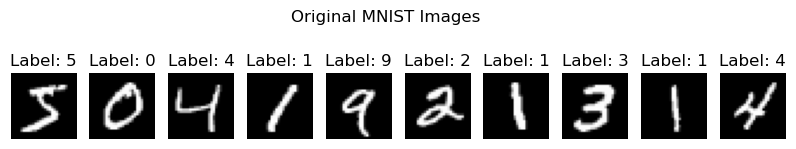

In [16]:
import matplotlib.pyplot as plt

# Function to visualize images
def visualize_images(images, labels, num_images=10, title="Original MNIST Images"):
    plt.figure(figsize=(10, 2))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.title(f"Label: {labels[i].argmax()}")
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

# Visualize original MNIST dataset
visualize_images(x_train, y_train, num_images=10)

# Image processing

## 1. Gaussian noise

In [4]:
import numpy as np
from keras.datasets import mnist
from skimage.util import random_noise
import matplotlib.pyplot as plt

In [5]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [6]:
# Reshape for CNN input
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [7]:
# Function to add Gaussian noise
def add_gaussian_noise(images, mean=0, var=0.1):
    noisy_images = []
    for img in images:
        noisy_img = random_noise(img, mode='gaussian', mean=mean, var=var)
        noisy_images.append(noisy_img)
    return np.array(noisy_images)

In [8]:
# Apply Gaussian noise
x_train_noisy = add_gaussian_noise(x_train, var=0.05)
x_test_noisy = add_gaussian_noise(x_test, var=0.05)

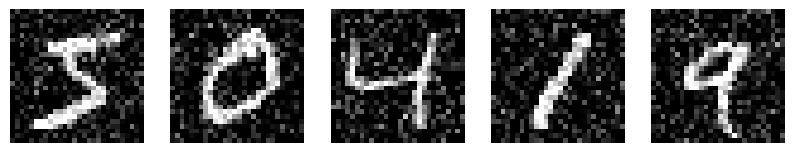

In [9]:
# Visualize some noisy images
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_train_noisy[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()

### CNN on Gaussian noise

In [10]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical

In [11]:
# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [12]:
# CNN model architecture
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

C:\Users\shrut\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model on the noisy dataset
history = model.fit(x_train_noisy, y_train, epochs=20, batch_size=128,steps_per_epoch = 20,validation_data=(x_test_noisy, y_test))

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 30s 981ms/step - accuracy: 0.1805 - loss: 2.2218 - val_accuracy: 0.6162 - val_loss: 1.4500
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 336ms/step - accuracy: 0.4957 - loss: 1.4896 - val_accuracy: 0.8254 - val_loss: 0.5963
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 455ms/step - accuracy: 0.6897 - loss: 0.9336 - val_accuracy: 0.9003 - val_loss: 0.4118
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 831ms/step - accuracy: 0.7897 - loss: 0.6766 - val_accuracy: 0.9154 - val_loss: 0.3032
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 823ms/step - accuracy: 0.8227 - loss: 0.5579 - val_accuracy: 0.9331 - val_loss: 0.2313
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 778ms/step - accuracy: 0.8641 - loss: 0.4629 - val_accuracy: 0.9450 - val_loss: 0.1890
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 931ms/step - accuracy: 0.8811 - loss: 0.3874 - val_accuracy: 0.9545 - val_loss: 0.1646
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 441ms/step - accuracy: 0.8818 - loss: 0.3979 - val_accurac

In [14]:
# Evaluate the model
score = model.evaluate(x_test_noisy, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.08162621408700943
Test accuracy: 0.9749000072479248


## Training Accuracy - 0.9411
## Test Accuracy - 0.9749000072479248

## 2. Contrast Adjustment 

In [15]:
import numpy as np
from keras.datasets import mnist
from skimage import exposure
import matplotlib.pyplot as plt

In [16]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [18]:
# Reshape for CNN input
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [19]:
# Function to adjust contrast
def adjust_contrast(images, gamma=0.5):
    contrast_images = []
    for img in images:
        contrast_img = exposure.adjust_gamma(img, gamma=gamma)  # Increase contrast
        contrast_images.append(contrast_img)
    return np.array(contrast_images)

# Apply contrast adjustment
x_train_contrast = adjust_contrast(x_train, gamma=0.5)
x_test_contrast = adjust_contrast(x_test, gamma=0.5)

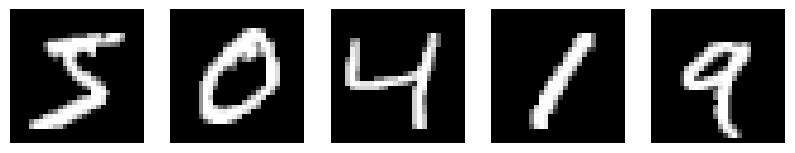

In [20]:
# Visualize some contrast-adjusted images
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_train_contrast[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()

### CNN on contrast adjustment

In [21]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical

In [22]:
# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [23]:
# CNN model architecture
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

In [24]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model on the contrast-adjusted dataset
history = model.fit(x_train_contrast, y_train, epochs=20, batch_size=128, validation_data=(x_test_contrast, y_test))

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 123s 224ms/step - accuracy: 0.7810 - loss: 0.6593 - val_accuracy: 0.9814 - val_loss: 0.0563
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 45s 95ms/step - accuracy: 0.9709 - loss: 0.1054 - val_accuracy: 0.9876 - val_loss: 0.0412
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 48s 102ms/step - accuracy: 0.9805 - loss: 0.0678 - val_accuracy: 0.9890 - val_loss: 0.0373
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 44s 94ms/step - accuracy: 0.9845 - loss: 0.0530 - val_accuracy: 0.9913 - val_loss: 0.0304
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 59s 125ms/step - accuracy: 0.9871 - loss: 0.0440 - val_accuracy: 0.9902 - val_loss: 0.0323
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 53s 113ms/step - accuracy: 0.9894 - loss: 0.0366 - val_accuracy: 0.9898 - val_loss: 0.0321
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 421s 900ms/step - accuracy: 0.9914 - loss: 0.0303 - val_accuracy: 0.9917 - val_loss: 0.0282
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 48s 101ms/step - accuracy: 0.9916 - loss: 0

In [25]:
# Evaluate the model
score = model.evaluate(x_test_contrast, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.03586503118276596
Test accuracy: 0.9912999868392944


## Training Accuracy - 0.9963
## Test Accuracy - 0.9912999868392944

### 4. Thresholding Detection

In [21]:
import numpy as np
import cv2
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [22]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [23]:
# Reshape for CNN input
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [24]:
# Function to apply thresholding
def apply_thresholding(images):
    threshold_images = []
    for img in images:
        # Squeeze dimensions for 2D filter, apply thresholding
        _, thresh_img = cv2.threshold((img.squeeze() * 255).astype('uint8'), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        threshold_images.append(thresh_img)
    # Reshape back to add channel dimension
    return np.array(threshold_images).reshape(-1, 28, 28, 1)

In [25]:
# Apply thresholding
x_train_thresholded = apply_thresholding(x_train)
x_test_thresholded = apply_thresholding(x_test)

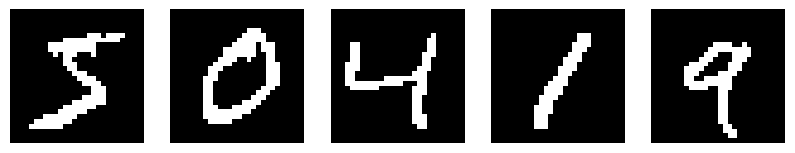

In [26]:
# Visualize some thresholded images
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_train_thresholded[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()

### CNN on Thresholding Detection

In [27]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical

In [28]:
# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [29]:
# CNN model architecture
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

In [30]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model on the thresholded dataset
history = model.fit(x_train_thresholded, y_train, epochs=10, batch_size=128, validation_data=(x_test_thresholded, y_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 107s 223ms/step - accuracy: 0.6063 - loss: 3.1117 - val_accuracy: 0.9740 - val_loss: 0.0972
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 98s 208ms/step - accuracy: 0.9412 - loss: 0.2122 - val_accuracy: 0.9784 - val_loss: 0.0850
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 95s 202ms/step - accuracy: 0.9610 - loss: 0.1464 - val_accuracy: 0.9782 - val_loss: 0.0741
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 97s 206ms/step - accuracy: 0.9694 - loss: 0.1181 - val_accuracy: 0.9826 - val_loss: 0.0706
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 98s 210ms/step - accuracy: 0.9741 - loss: 0.0980 - val_accuracy: 0.9834 - val_loss: 0.0621
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 93s 199ms/step - accuracy: 0.9777 - loss: 0.0832 - val_accuracy: 0.9845 - val_loss: 0.0555
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 145s 204ms/step - accuracy: 0.9786 - loss: 0.0793 - val_accuracy: 0.9852 - val_loss: 0.0523
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 97s 206ms/step - accuracy: 0.9823 - loss:

In [31]:
# Evaluate the model
score = model.evaluate(x_test_thresholded, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.04653257876634598
Test accuracy: 0.9865000247955322


### Test accuracy - 0.9865000247955322
### Train accuracy - 0.9835